<a href="https://colab.research.google.com/github/120Davies/DS-Unit-4-Sprint-1-NLP/blob/master/Ro_Davies_LS_DS_415_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [0]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [0]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [0]:
"""
Import Statements
"""
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
!pip install gensim
!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")
tokenizer = Tokenizer(nlp.vocab)

  Stored in directory: C:\Users\macky\AppData\Local\pip\Cache\wheels\5f\ea\fb\5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs', 've', 'got', 'food', 'great', 'good', 'place', 'like', 'service', 'time']))
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOP_WORDS]


In [0]:
yelp['tokens'] = yelp['text'].apply(tokenize)
yelp['tokens'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, lunch, togo, service, quick, staff, fri...
2    [ve, vegas, dozens, times, stepped, foot, circ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# vect = CountVectorizer()
# vect.fit(yelp['text'])
# dtm = vect.transform(yelp['text'])
# print(vect.get_feature_names())
# dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
# dtm.head()
tfidf = TfidfVectorizer(stop_words = 'english')
dtm = tfidf.fit_transform(yelp['text'])
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
fake_review = [ """OMG Dr. Winehurst is the best dentist I ever had!!! I had lost most of my teeth
due to a decades-long addiction to meth and and chewing on rocks, but this wonderful dentist restored
my smile to its former glory while also saving my child from alligators. No sucker after the visit
though. Three stars."""]

In [0]:
fake = tfidf.transform(fake_review)
nn.kneighbors(fake.todense())

(array([[1.2144214 , 1.21462343, 1.21483156, 1.22856642, 1.23373509,
         1.25149316, 1.26434898, 1.27433674, 1.27494822, 1.27894596]]),
 array([[5763, 7515,  713, 7399, 2922, 7061, 8949, 6088, 5502,  420]],
       dtype=int64))

In [0]:
for x in nn.kneighbors(fake.todense())[1]:
    print(yelp['text'][x][:200])

5763    My son was complaining about a tooth bothering...
7515    Just an update to my other review, the cap tha...
713     Being new to a city often times means starting...
7399    From start to finish a great experience here. ...
2922    Moved here from the Midwest. I've only had one...
7061    He's the best dentist I've been to. My dentist...
8949    Very friendly, very professional staff. Dr Har...
6088    Hands down, the best dentist I've ever been to...
5502    Update. I had a review last year so I'm guessi...
420     Dr. Woolf has been so amazing! I was starting ...
Name: text, dtype: object


In [0]:
# Seems like we stay in the 'dentist' category.

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [0]:
# I'll use random forest and SGDClassifer, since I imported them already
randomforest = RandomForestClassifier()
sgdc = SGDClassifier()

In [0]:
# Fit a pipeline
pipeline = Pipeline([('tfidf', tfidf), ('randomforest', randomforest)])
pipeline.fit(yelp['text'], yelp['stars'])

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [0]:
pipeline.predict(fake_review)

array([5], dtype=int64)

In [0]:
parameters = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__min_df': (.02, .05),
    'tfidf__max_features': (100, 500, 1000),
    'randomforest__n_estimators': (20, 100, 400)
}

In [0]:
grid = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4, verbose=1)
grid.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 12.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [0]:
grid.best_params_

{'randomforest__n_estimators': 400,
 'tfidf__max_df': 0.5,
 'tfidf__max_features': 500,
 'tfidf__min_df': 0.02}

In [0]:
print("Best score:", grid.best_score_)

Best score: 0.5804


In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200,
                   algorithm='randomized',
                   n_iter=10)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [0]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [0]:
id2word = Dictionary(yelp['tokens'])

Create a bag of words representation of the entire corpus

In [0]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [0]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [0]:
import squarify

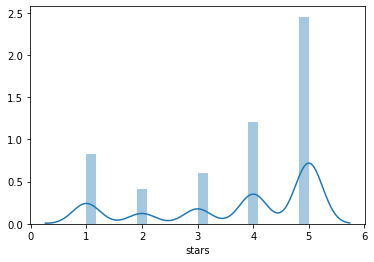

In [0]:
sns.distplot(yelp['stars'])

In [0]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

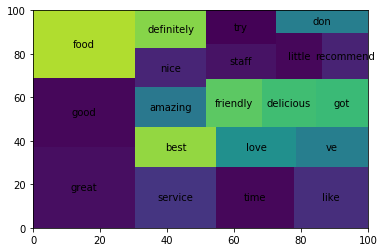

In [0]:
high_rated = count(yelp[yelp['stars'] >= 4]['tokens'])
wc_20_hr = high_rated[high_rated['rank'] <= 20]

low_rated = count(yelp[yelp['stars'] <= 3]['tokens'])
wc_20_lr = low_rated[low_rated['rank'] <= 20]

squarify.plot(sizes=wc_20_hr['pct_total'], label=wc_20_hr['word'])

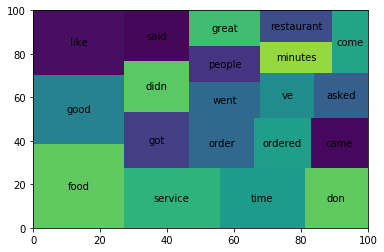

In [0]:
squarify.plot(sizes=wc_20_lr['pct_total'], label=wc_20_lr['word'])

## Analysis

Some words are common among reviews of all ratings, such as 'good' and 'great', but occur more frequently in good reviews. 
The best words to get in a review are 'amazing', 'food', 'friendly', and other expected, generally positive words.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)